# Определение перспективного тарифа для телеком-компании

# Описание проекта


Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.


Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Описание тарифов

**Тариф «Смарт»**

Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафик
Стоимость услуг сверх тарифного пакета:

- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей


**Тариф «Ультра»**

Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

***Примечание:***

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

# Описание данных

Таблица ***users*** (информация о пользователях):

- **user_id** — уникальный идентификатор пользователя
- **first_name** — имя пользователя
- **last_name** — фамилия пользователя
- **age** — возраст пользователя (годы)
- **reg_date** — дата подключения тарифа (день, месяц, год)
- **churn_date** — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- **city** — город проживания пользователя
- **tariff** — название тарифного плана

Таблица ***calls*** (информация о звонках):

- **id** — уникальный номер звонка
- **call_date** — дата звонка
- **duration** — длительность звонка в минутах
- **user_id** — идентификатор пользователя, сделавшего звонок

Таблица ***messages*** (информация о сообщениях):

- **id** — уникальный номер сообщения
- **message_date** — дата сообщения
- **user_id** — идентификатор пользователя, отправившего сообщение

Таблица ***internet*** (информация об интернет-сессиях):

- **id** — уникальный номер сессии
- **mb_used** — объём потраченного за сессию интернет-трафика (в мегабайтах)
- **session_date** — дата интернет-сессии
- **user_id** — идентификатор пользователя

Таблица ***tariffs*** (информация о тарифах):

- **tariff_name** — название тарифа
- **rub_monthly_fee** — ежемесячная абонентская плата в рублях
- **minutes_included** — количество минут разговора в месяц, включённых в абонентскую плату
- **messages_included** — количество сообщений в месяц, включённых в абонентскую плату
- **mb_per_month_included** — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- **rub_per_minute** — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- **rub_per_message** — стоимость отправки сообщения сверх тарифного пакета
- **rub_per_gb** — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Откройте файл с данными и изучите общую информацию

In [1]:
#импортируем библиотеки

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from scipy import stats as st

In [2]:
# добавим соответсвующие датасеты

users = pd.read_csv('users.csv') # датасет пользователей
users.info()
print()

calls = pd.read_csv('calls.csv') # датасет звонков
calls.info()
print()

messages = pd.read_csv('messages.csv') # датасет сообщений
messages.info()
print()

internet = pd.read_csv('internet.csv') # датасет интернета
internet.info()
print()

tariffs = pd.read_csv('tariffs.csv') # датасет тарифов   
tariffs.info()
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB

<class 'pandas.core.frame

Как говорилось в описании, таблицы содержат информацию по 500 клиентам.

Связаны датасеты посредством столбцов **user_id** и **id**.

Пропуски в датасете отсутствуют, так как значения в столбце **churn_date** могут быть пустыми, если клиент пользовался тарифом во время сбора данных.

В датасете **internet** есть неизвестный столбец **Unnamed:0**

<div class="alert alert">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Стоит посмотреть на распределение ключевых данных в таблицах (как минимум в таблице звонков и интернета)

<div class="alert alert-info">
<font size="4"><b>Комментарий студента</b></font>

Не совсем понятно для чего делать это в самом начале?

Тем более, что проект вроде как предполагает данное действие несколько позже)
    
Если все-таки считаешь это уместным, то было бы неплохо конкретики по распределению данных в зависимости от *чего*, *временные рамки*, *разбросы*? или еще какие вводные, потому что я не совсем понял твое замечание
    
По заданию, мы позже уже работаем с обработанными данными за месяц
    
Ниже я, конечно, показал гистограммы распределения длительности звонков и использования интернет-трафика в мб за сессию (не исключив нулевые значения), но повторюсь, смысла искать и смотреть распредления в самом начале я не вижу (и(или) не понимаю) (тут разве что я могу подметить, что 0-ых значений в этих столбцах очень много)


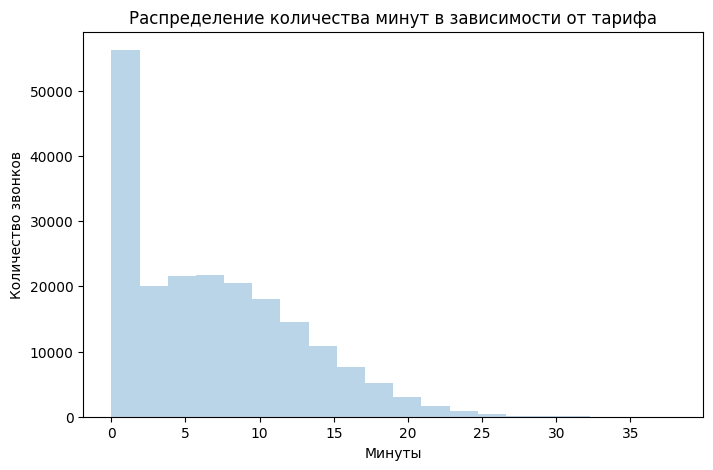

In [3]:
plt.figure(figsize=(8,5))
plt.hist(calls['duration'], bins = 20, alpha =0.3)
plt.xlabel('Минуты')
plt.ylabel('Количество звонков')
plt.title('Распределение количества минут в зависимости от тарифа')
plt.show()

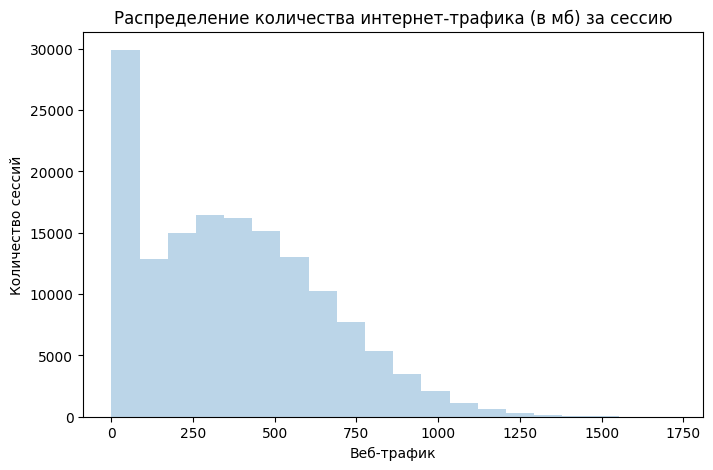

In [4]:
plt.figure(figsize=(8,5))
plt.hist(internet['mb_used'], bins = 20, alpha =0.3)
plt.xlabel('Веб-трафик')
plt.ylabel('Количество сессий')
plt.title('Распределение количества интернет-трафика (в мб) за сессию')
plt.show()

<div class="alert alert-success">
<font size="4"><b>Комментарий ревьюера V2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
0-е значения сигнализируют нам, что клиенты пытались, но не смогли воспользоваться услугами, происходит обрыв сессий и звонков, возможно надо бить тревогу и бежать к технарям, после детального и глубокого анализа: город, время, клиент у кого произошел обрыв ...
        
Эту информацию тяжело отследить на агрегированных данных
        
Это на твое усмотрение — как вариант для глубого анализа

## Подготовте данные

In [5]:
#изучим датасет users

display(users.head())

#проверим на дупликаты

print(f' количество дупликатов в датасете users равно {users.duplicated().sum()}')

#необходимо перевести столбцы churn_date, reg_date во временной тип данных
                                                                                        
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')

#проверим, правмльно ли все заменилось
users.dtypes

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


 количество дупликатов в датасете users равно 0


user_id                int64
age                    int64
churn_date    datetime64[ns]
city                  object
first_name            object
last_name             object
reg_date      datetime64[ns]
tariff                object
dtype: object

In [6]:
#изучим датасет calls

display(calls.head())

#проверим на дупликаты

print(f' количество дупликатов в датасете users равно {calls.duplicated().sum()}')

#необходимо перевести столбцы call_date во временной тип данных
#значение столбца duration необходимо округлить в большую сторону в связи с особенностями расчета
                                                                                        
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')

#calls['duration'] = calls['duration'].astype(int) заменяет значения неверно
#воспользуемся сначала методом np.ceil

calls['duration'] = np.ceil(calls['duration']).astype(int)

#проверим, правильно ли все заменилось
calls.dtypes

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


 количество дупликатов в датасете users равно 0


id                   object
call_date    datetime64[ns]
duration              int64
user_id               int64
dtype: object

In [7]:
#изучим датасет messages

display(messages.head())

#проверим на дупликаты

print(f' количество дупликатов в датасете users равно {messages.duplicated().sum()}')

#необходимо перевести столбцы message_date во временной тип данных
                                                                                        
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')

#проверим, правмльно ли все заменилось
messages.dtypes

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


 количество дупликатов в датасете users равно 0


id                      object
message_date    datetime64[ns]
user_id                  int64
dtype: object

In [8]:
#изучим датасет internet

display(internet.head())

#содержимое неизвестного столбца повторяет нумерацию строк таблицы, не имеет смысла его оставлять
del(internet['Unnamed: 0'])

#проверим на дупликаты

print(f' количество дупликатов в датасете users равно {internet.duplicated().sum()}')

#необходимо перевести столбцы session_date во временной тип данных
#значение столбца mb_used сначала не будем округлять в большую сторону в связи с особенностями расчета, 
#сделаем это после компоновки расчетной таблицы 
                                                                                        
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')



#проверим, правмльно ли все заменилось
internet.dtypes

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


 количество дупликатов в датасете users равно 0


id                      object
mb_used                float64
session_date    datetime64[ns]
user_id                  int64
dtype: object

In [9]:
#изучим датасет tariffs

display(tariffs.head())

#проверим типы данных 
tariffs.dtypes

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


messages_included         int64
mb_per_month_included     int64
minutes_included          int64
rub_monthly_fee           int64
rub_per_gb                int64
rub_per_message           int64
rub_per_minute            int64
tariff_name              object
dtype: object

Типы данных таблиц в порядке

Ненужные данные были исключены

In [10]:
#посчитаем для каждого пользователя количество звонков и израсходованных минут за каждый месяц

new_table = users['user_id'] #в новую таблицу запишем user_id

#в таблице calls создадим столбец с названием месяцев, чтобы создать сводную таблицу,
#найти нужные нам параметры и присоединить их по user_id к таблице new_table
calls['months'] = calls['call_date'].dt.month

new_table = pd.merge(new_table ,
                     calls.pivot_table(index = ['user_id', 'months'],
                                       values = ['duration'], 
                                       aggfunc = ('count', 'sum'))\
                     .reset_index(),
                     on = 'user_id',
                     how = 'outer').reset_index(drop = True)

#приведем в порядок названия столбцов
#new_table.columns = ['user_id','months', 'calls_count', 'calls_minutes']
new_table = new_table.rename(columns = {('months', ''):"months",
                                        ('duration', 'count'): 'calls_count', 
                                        ('duration', 'sum') : 'calls_minutes'})

#проверим результат
display(new_table)
#узнаем информацию о датасете
new_table.info()

/var/folders/wd/gl0hh07s1f73kj7kynty4z6r0000gn/T/ipykernel_14762/2682229136.py:9: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  new_table = pd.merge(new_table ,
/var/folders/wd/gl0hh07s1f73kj7kynty4z6r0000gn/T/ipykernel_14762/2682229136.py:9: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_table = pd.merge(new_table ,


,user_id,months,calls_count,calls_minutes
0,1000,5.0,22.0,159.0
1,1000,6.0,43.0,172.0
2,1000,7.0,47.0,340.0
3,1000,8.0,52.0,408.0
4,1000,9.0,58.0,466.0
...,...,...,...,...
3177,1498,10.0,41.0,247.0
3178,1499,9.0,9.0,70.0
3179,1499,10.0,68.0,449.0
3180,1499,11.0,74.0,612.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        3182 non-null   int64  
 1   months         3174 non-null   float64
 2   calls_count    3174 non-null   float64
 3   calls_minutes  3174 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 99.6 KB


In [11]:
#узнаем про пропуски
new_table.isna().sum()

user_id          0
months           8
calls_count      8
calls_minutes    8
dtype: int64

In [12]:
new_table[new_table['months'].isna()]

,user_id,months,calls_count,calls_minutes
570,1091,NaN,NaN,NaN
664,1106,NaN,NaN,NaN
812,1128,NaN,NaN,NaN
1460,1231,NaN,NaN,NaN
2061,1328,NaN,NaN,NaN
2311,1371,NaN,NaN,NaN
3022,1473,NaN,NaN,NaN
3121,1489,NaN,NaN,NaN


Получается, данные пользователи никому не звонили за все время использования тарифа

In [13]:
#посчитаем для каждого пользователя количество сообщений за каждый месяц

#в таблице messages создадим столбец с названием месяцев, чтобы создать сводную таблицу,
#найти нужные нам параметры и присоединить их по user_id к таблице new_table
messages['months'] = messages['message_date'].dt.month

new_table = pd.merge(new_table ,
                     messages.groupby(['user_id', 'months'])['id']\
                     .count().reset_index(),
                     on = ['user_id', 'months'],
                     how = 'outer').reset_index(drop = True)

#приведем в порядок названия столбцов
#new_table.columns = ['user_id','months', 'calls_count', 'calls_minutes', 'messages_count']
new_table = new_table.rename(columns = {'id':'messages_count'})

#проверим результат
display(new_table)
#узнаем информацию о датасете
new_table.info()

,user_id,months,calls_count,calls_minutes,messages_count
0,1000,5.0,22.0,159.0,22.0
1,1000,6.0,43.0,172.0,60.0
2,1000,7.0,47.0,340.0,75.0
3,1000,8.0,52.0,408.0,81.0
4,1000,9.0,58.0,466.0,57.0
...,...,...,...,...,...
3216,1489,8.0,NaN,NaN,17.0
3217,1489,9.0,NaN,NaN,32.0
3218,1489,10.0,NaN,NaN,21.0
3219,1489,11.0,NaN,NaN,20.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3221 non-null   int64  
 1   months          3213 non-null   float64
 2   calls_count     3174 non-null   float64
 3   calls_minutes   3174 non-null   float64
 4   messages_count  2717 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 125.9 KB


In [14]:
# проверить

new_table[new_table['user_id'] == 1473] 

,user_id,months,calls_count,calls_minutes,messages_count
3022,1473,NaN,NaN,NaN,NaN
3211,1473,8.0,NaN,NaN,17.0
3212,1473,9.0,NaN,NaN,19.0
3213,1473,10.0,NaN,NaN,20.0
3214,1473,11.0,NaN,NaN,14.0
3215,1473,12.0,NaN,NaN,20.0


In [15]:
#узнаем про пропуски
new_table.isna().sum()

user_id             0
months              8
calls_count        47
calls_minutes      47
messages_count    504
dtype: int64

Появились новые пропуски в связи с тем, что  данных по этим клиентам или не появилось, или они данные для новых столбоцов отсутсвуют в уже имеющихся 

In [16]:
#посчитаем для каждого пользователя количество интернет-трафика за каждый месяц

#в таблице internet создадим столбец с названием месяцев, чтобы создать сводную таблицу,
#найти нужные нам параметры и присоединить их по user_id к таблице new_table
internet['months'] = internet['session_date'].dt.month

new_table = pd.merge(new_table ,
                     np.ceil(internet.groupby(['user_id', 'months'])['mb_used']\
                             .sum().reset_index()).astype(int),
                     on = ['user_id', 'months'],
                     how = 'outer').reset_index(drop = True)

#приведем в порядок названия столбцов

new_table = new_table.rename(columns = {'mb_used': 'internet_mb_count'})


#добавим столбец с округлением в верхнюю сторону по гб
new_table['internet_gb_round'] = np.ceil(np.array((new_table['internet_mb_count']) / 1024))
#проверим результат
display(new_table)
#узнаем информацию о датасете
new_table.info()

,user_id,months,calls_count,calls_minutes,messages_count,internet_mb_count,internet_gb_round
0,1000,5.0,22.0,159.0,22.0,2254.0,3.0
1,1000,6.0,43.0,172.0,60.0,23234.0,23.0
2,1000,7.0,47.0,340.0,75.0,14004.0,14.0
3,1000,8.0,52.0,408.0,81.0,14056.0,14.0
4,1000,9.0,58.0,466.0,57.0,14569.0,15.0
...,...,...,...,...,...,...,...
3217,1489,9.0,NaN,NaN,32.0,17207.0,17.0
3218,1489,10.0,NaN,NaN,21.0,19560.0,20.0
3219,1489,11.0,NaN,NaN,20.0,17492.0,18.0
3220,1489,12.0,NaN,NaN,35.0,17323.0,17.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            3222 non-null   int64  
 1   months             3214 non-null   float64
 2   calls_count        3174 non-null   float64
 3   calls_minutes      3174 non-null   float64
 4   messages_count     2717 non-null   float64
 5   internet_mb_count  3203 non-null   float64
 6   internet_gb_round  3203 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 176.3 KB


In [17]:
# проверить

new_table[new_table['user_id'] == 1473] 

,user_id,months,calls_count,calls_minutes,messages_count,internet_mb_count,internet_gb_round
3022,1473,NaN,NaN,NaN,NaN,NaN,NaN
3211,1473,8.0,NaN,NaN,17.0,12906.0,13.0
3212,1473,9.0,NaN,NaN,19.0,17290.0,17.0
3213,1473,10.0,NaN,NaN,20.0,13689.0,14.0
3214,1473,11.0,NaN,NaN,14.0,21674.0,22.0
3215,1473,12.0,NaN,NaN,20.0,18419.0,18.0


In [18]:
#узнаем про пропуски
new_table.isna().sum()

user_id                0
months                 8
calls_count           48
calls_minutes         48
messages_count       505
internet_mb_count     19
internet_gb_round     19
dtype: int64

In [19]:
#для подсчета выручки объедним добавим информацию о тарифе в new_table
new_table = pd.merge(new_table,
                    users[['user_id', 'tariff', 'reg_date', 'churn_date', 'city']],
                    on = 'user_id', 
                    how = 'left').reset_index(drop = True)

#отсортируем датасет по user_id и months и проверим результат
display(new_table.sort_values(['user_id', 'months'], ascending = True))


#создадим столбец months_name, который заполним названиями месяцев заполним названиями месяцев
new_table['months_name'] = pd.to_datetime(new_table['months'], format = '%m').dt.month_name()

#перенесем столбец months_name на место следующего после months
new_table = new_table.reindex(columns = ['user_id',
                                         'months',
                                         'months_name',                                                                
                                         'calls_count',
                                         'calls_minutes',
                                         'messages_count',
                                         'internet_mb_count',
                                         'internet_gb_round',
                                         'tariff', 
                                         'reg_date',
                                         'churn_date',
                                         'city'])

#узнаем информацию о датасете
new_table.info()

,user_id,months,calls_count,calls_minutes,messages_count,internet_mb_count,internet_gb_round,tariff,reg_date,churn_date,city
0,1000,5.0,22.0,159.0,22.0,2254.0,3.0,ultra,2018-05-25,NaT,Краснодар
1,1000,6.0,43.0,172.0,60.0,23234.0,23.0,ultra,2018-05-25,NaT,Краснодар
2,1000,7.0,47.0,340.0,75.0,14004.0,14.0,ultra,2018-05-25,NaT,Краснодар
3,1000,8.0,52.0,408.0,81.0,14056.0,14.0,ultra,2018-05-25,NaT,Краснодар
4,1000,9.0,58.0,466.0,57.0,14569.0,15.0,ultra,2018-05-25,NaT,Краснодар
...,...,...,...,...,...,...,...,...,...,...,...
3177,1498,10.0,41.0,247.0,42.0,20580.0,21.0,smart,2018-07-19,2018-10-25,Владикавказ
3178,1499,9.0,9.0,70.0,11.0,1846.0,2.0,smart,2018-09-27,NaT,Пермь
3179,1499,10.0,68.0,449.0,48.0,17789.0,18.0,smart,2018-09-27,NaT,Пермь
3180,1499,11.0,74.0,612.0,59.0,17964.0,18.0,smart,2018-09-27,NaT,Пермь


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            3222 non-null   int64         
 1   months             3214 non-null   float64       
 2   months_name        3214 non-null   object        
 3   calls_count        3174 non-null   float64       
 4   calls_minutes      3174 non-null   float64       
 5   messages_count     2717 non-null   float64       
 6   internet_mb_count  3203 non-null   float64       
 7   internet_gb_round  3203 non-null   float64       
 8   tariff             3222 non-null   object        
 9   reg_date           3222 non-null   datetime64[ns]
 10  churn_date         189 non-null    datetime64[ns]
 11  city               3222 non-null   object        
dtypes: datetime64[ns](2), float64(6), int64(1), object(3)
memory usage: 302.2+ KB


In [20]:
# проверить

new_table[new_table['user_id'] == 1473] 

,user_id,months,months_name,calls_count,calls_minutes,messages_count,internet_mb_count,internet_gb_round,tariff,reg_date,churn_date,city
3022,1473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ultra,2018-08-05,NaT,Красноярск
3211,1473,8.0,August,NaN,NaN,17.0,12906.0,13.0,ultra,2018-08-05,NaT,Красноярск
3212,1473,9.0,September,NaN,NaN,19.0,17290.0,17.0,ultra,2018-08-05,NaT,Красноярск
3213,1473,10.0,October,NaN,NaN,20.0,13689.0,14.0,ultra,2018-08-05,NaT,Красноярск
3214,1473,11.0,November,NaN,NaN,14.0,21674.0,22.0,ultra,2018-08-05,NaT,Красноярск
3215,1473,12.0,December,NaN,NaN,20.0,18419.0,18.0,ultra,2018-08-05,NaT,Красноярск


In [21]:
#такжу добавим данные из таблицы  tariff в датасет new_table
#переименуем столбец в датасете tariffs 
tariffs = tariffs.rename(columns = {'tariff_name':'tariff'})

new_table = pd.merge(new_table,
                    tariffs,
                    on = 'tariff', 
                    how = 'outer').reset_index(drop = True)

#изучим результат
display(new_table)

,user_id,months,months_name,calls_count,calls_minutes,messages_count,internet_mb_count,internet_gb_round,tariff,reg_date,churn_date,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,May,22.0,159.0,22.0,2254.0,3.0,ultra,2018-05-25,NaT,Краснодар,1000,30720,3000,1950,150,1,1
1,1000,6.0,June,43.0,172.0,60.0,23234.0,23.0,ultra,2018-05-25,NaT,Краснодар,1000,30720,3000,1950,150,1,1
2,1000,7.0,July,47.0,340.0,75.0,14004.0,14.0,ultra,2018-05-25,NaT,Краснодар,1000,30720,3000,1950,150,1,1
3,1000,8.0,August,52.0,408.0,81.0,14056.0,14.0,ultra,2018-05-25,NaT,Краснодар,1000,30720,3000,1950,150,1,1
4,1000,9.0,September,58.0,466.0,57.0,14569.0,15.0,ultra,2018-05-25,NaT,Краснодар,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,1489,8.0,August,NaN,NaN,17.0,11051.0,11.0,smart,2018-08-15,NaT,Санкт-Петербург,50,15360,500,550,200,3,3
3218,1489,9.0,September,NaN,NaN,32.0,17207.0,17.0,smart,2018-08-15,NaT,Санкт-Петербург,50,15360,500,550,200,3,3
3219,1489,10.0,October,NaN,NaN,21.0,19560.0,20.0,smart,2018-08-15,NaT,Санкт-Петербург,50,15360,500,550,200,3,3
3220,1489,11.0,November,NaN,NaN,20.0,17492.0,18.0,smart,2018-08-15,NaT,Санкт-Петербург,50,15360,500,550,200,3,3


In [22]:
#изучим пропуски

new_table.isna().sum()

user_id                     0
months                      8
months_name                 8
calls_count                48
calls_minutes              48
messages_count            505
internet_mb_count          19
internet_gb_round          19
tariff                      0
reg_date                    0
churn_date               3033
city                        0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [23]:
#пропуски в столбцах (кроме months и months_name) означают лишь то, что клиенты данными этими услугами не пользовались,
#поэтому логично будет их заполнить 0
new_table[['calls_count', 'calls_minutes', 'messages_count', 'internet_mb_count']] = \
new_table[['calls_count', 'calls_minutes', 'messages_count', 'internet_mb_count']].fillna(0)
new_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3222 non-null   int64         
 1   months                 3214 non-null   float64       
 2   months_name            3214 non-null   object        
 3   calls_count            3222 non-null   float64       
 4   calls_minutes          3222 non-null   float64       
 5   messages_count         3222 non-null   float64       
 6   internet_mb_count      3222 non-null   float64       
 7   internet_gb_round      3203 non-null   float64       
 8   tariff                 3222 non-null   object        
 9   reg_date               3222 non-null   datetime64[ns]
 10  churn_date             189 non-null    datetime64[ns]
 11  city                   3222 non-null   object        
 12  messages_included      3222 non-null   int64         
 13  mb_

In [24]:
#создадим функцию, которая будет проверять, превысил ли клиент тариф клиента и считает выручку от клиента
#в случае превышения клиентом лимита в той или иной категории, взымается дополнительная плата
def revenue(data):
    call = (data['calls_minutes']-data['minutes_included'])*data['rub_per_minute']
    message = (data['messages_count']-data['messages_included'])*data['rub_per_message']
    mb = np.ceil((data['internet_mb_count']-data['mb_per_month_included'])/1024)*data['rub_per_gb']
    total = 0
    for item in [call, message, mb]:
        if item < 0:
            item = 0
            total += item
        else:
            total +=item
    total += data['rub_monthly_fee']
    return total

new_table['revenue'] = new_table.apply(revenue, axis = 1)    


#удалим строки с NaN, искажающее значение выручки с клиента
new_table = new_table.drop(index = 
                           new_table[(new_table['user_id'].isin(
                               new_table[(new_table['user_id'].isin(new_table[new_table['months'].isna()]['user_id'])) & 
                                    (new_table['months'].isna()==False)]['user_id'].unique())
                                     )& (new_table['months'].isna())].index )



#также удалим столбцы, которые нам больше не пригодятся в исследовании
new_table = new_table.drop(columns= ['messages_included',
                                     'mb_per_month_included',
                                     'minutes_included', 
                                     'rub_monthly_fee',
                                     'rub_per_gb',  
                                     'rub_per_message',
                                     'rub_per_minute'])

#изучим пропуски
print(new_table.isna().sum())

#изучим результат
display(new_table)

user_id                 0
months                  2
months_name             2
calls_count             0
calls_minutes           0
messages_count          0
internet_mb_count       0
internet_gb_round      13
tariff                  0
reg_date                0
churn_date           3027
city                    0
revenue                 0
dtype: int64


,user_id,months,months_name,calls_count,calls_minutes,messages_count,internet_mb_count,internet_gb_round,tariff,reg_date,churn_date,city,revenue
0,1000,5.0,May,22.0,159.0,22.0,2254.0,3.0,ultra,2018-05-25,NaT,Краснодар,1950.0
1,1000,6.0,June,43.0,172.0,60.0,23234.0,23.0,ultra,2018-05-25,NaT,Краснодар,1950.0
2,1000,7.0,July,47.0,340.0,75.0,14004.0,14.0,ultra,2018-05-25,NaT,Краснодар,1950.0
3,1000,8.0,August,52.0,408.0,81.0,14056.0,14.0,ultra,2018-05-25,NaT,Краснодар,1950.0
4,1000,9.0,September,58.0,466.0,57.0,14569.0,15.0,ultra,2018-05-25,NaT,Краснодар,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,1489,8.0,August,0.0,0.0,17.0,11051.0,11.0,smart,2018-08-15,NaT,Санкт-Петербург,550.0
3218,1489,9.0,September,0.0,0.0,32.0,17207.0,17.0,smart,2018-08-15,NaT,Санкт-Петербург,950.0
3219,1489,10.0,October,0.0,0.0,21.0,19560.0,20.0,smart,2018-08-15,NaT,Санкт-Петербург,1550.0
3220,1489,11.0,November,0.0,0.0,20.0,17492.0,18.0,smart,2018-08-15,NaT,Санкт-Петербург,1150.0


In [25]:
new_table[new_table['internet_gb_round']>30]

,user_id,months,months_name,calls_count,calls_minutes,messages_count,internet_mb_count,internet_gb_round,tariff,reg_date,churn_date,city,revenue
50,1024,11.0,November,157.0,1146.0,0.0,43108.0,43.0,ultra,2018-10-31,NaT,Санкт-Петербург,3900.0
51,1024,12.0,December,136.0,949.0,0.0,35949.0,36.0,ultra,2018-10-31,NaT,Санкт-Петербург,2850.0
78,1050,7.0,July,35.0,209.0,52.0,35178.0,35.0,ultra,2018-06-16,2018-10-03,Тюмень,2700.0
97,1060,12.0,December,184.0,1233.0,52.0,43932.0,43.0,ultra,2018-11-24,NaT,Калуга,3900.0
213,1124,10.0,October,152.0,1225.0,121.0,49746.0,49.0,ultra,2018-09-24,NaT,Махачкала,4800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2385,1306,12.0,December,66.0,484.0,0.0,34913.0,35.0,smart,2018-11-30,NaT,Чита,4550.0
2690,1386,9.0,September,69.0,352.0,53.0,31015.0,31.0,smart,2018-08-13,NaT,Новосибирск,3759.0
3048,1464,12.0,December,84.0,555.0,29.0,31565.0,31.0,smart,2018-02-17,NaT,Саранск,3915.0
3162,1486,11.0,November,108.0,764.0,96.0,36267.0,36.0,smart,2018-10-31,NaT,Нижний Новгород,5680.0


In [26]:
display(new_table[new_table['months'].isna()])

,user_id,months,months_name,calls_count,calls_minutes,messages_count,internet_mb_count,internet_gb_round,tariff,reg_date,churn_date,city,revenue
228,1128,NaN,NaN,0.0,0.0,0.0,0.0,NaN,ultra,2018-12-15,2018-12-23,Волжский,1950.0
2624,1371,NaN,NaN,0.0,0.0,0.0,0.0,NaN,smart,2018-12-25,2018-12-30,Омск,550.0


<div class="alert alert-info">
<font size="4"><b>Комментарий студента</b></font>

Теперь лишних данных по месяцам точно нет)
    
Осталось 2 абонента, которые не пользовались услугами 



Для двух пользователей известна дата прекращения использования тарифа, но их месяцы совпадают, то есть разовую оплату на подключение он все-таки совершил.

Следовательно, можно считать, что столбец **revenue** заполнен корректно и отражает помесячную оплату пользователей

Необходимые данные собраны в полном объеме, можно приступать к анализу и исседованию

## Проанализируйте данные

In [29]:
#для оценки поведения пользователей разных тарифов нужно среднюю, среднеквадратичное отклонение, дисперсию
#и построить соответствующие гистограммы

tariff_metric = \
new_table.pivot_table(index = 'tariff', 
                      values = ['calls_minutes', 'messages_count', 'internet_mb_count'], 
                      aggfunc = ['mean', 'var', 'std']).reset_index().round(3)
tariff_metric.columns = ['tariff',
                         'mean_calls', 'mean_mb', 'mean_messages', 
                         'var_calls', 'var_mb', 'var_messages',
                         'std_calls', 'std_mb', 'std_messages']
#узнаем результаты
tariff_metric.T

,0,1
tariff,smart,ultra
mean_calls,417.748,526.089
mean_mb,16201.604,19449.557
mean_messages,33.369,49.313
var_calls,36281.394,101052.494
var_mb,34564913.525,102032544.734
var_messages,796.955,2285.417
std_calls,190.477,317.888
std_mb,5879.193,10101.116
std_messages,28.23,47.806


По результатам расчета средних величин можно заключить следующее:
- среднему пользователю  тарифа **smart** не хватает лимита интернет-трафика тарифа, в связи с чем пользователь будет доплачивать за дополнительный гб 

- значения тарифа **ultra** имеют большие отклонения от нормальной величины, чем в противоположном тарифе. 

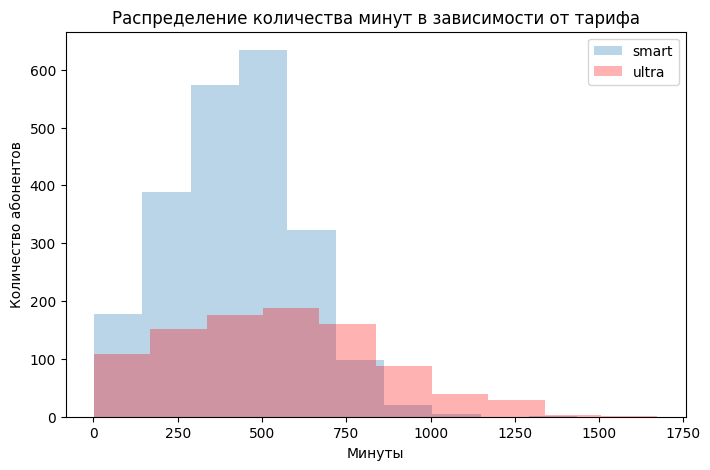

In [31]:
#Построим гистограммы распределения

#для звонков
plt.figure(figsize=(8,5))
plt.hist(new_table[(new_table['tariff']=='smart')&(new_table['calls_minutes']!=0)]['calls_minutes'], bins = 10, alpha =0.3, label = 'smart')
plt.hist(new_table[(new_table['tariff']=='ultra')&(new_table['calls_minutes']!=0)]['calls_minutes'], bins = 10, alpha = 0.3,  color = 'red', label = 'ultra')
plt.xlabel('Минуты')
plt.ylabel('Количество абонентов')
plt.legend()
plt.title('Распределение количества минут в зависимости от тарифа')
plt.show()

Распределение количества минут у 2 тарифов похожи.

Пик клиентов тарифа **ultra** находится правее, что говорит о том, что клиенты тарифа в среднем больше разговаривают по телефону, чем клиенты другого тарифа

Также можно увеидеть, что клиенты тарифа **ultra** не превышают лимит по минутам, установленный тарифом

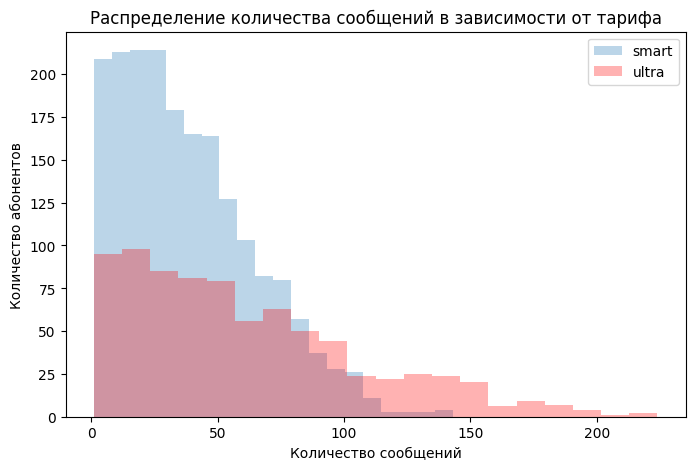

In [32]:
#для сообщений

plt.figure(figsize=(8,5))
plt.hist(new_table[(new_table['tariff']=='smart')&(new_table['messages_count']!=0)]['messages_count'], bins = 20, alpha =0.3, label = 'smart')
plt.hist(new_table[(new_table['tariff']=='ultra')&(new_table['messages_count']!=0)]['messages_count'], bins = 20,alpha = 0.3,  color = 'red', label = 'ultra')
plt.xlabel('Количество сообщений')
plt.ylabel('Количество абонентов')
plt.legend()
plt.title('Распределение количества сообщений в зависимости от тарифа')
plt.show()

Распределение количества сообщений у 2 тарифов похожи

Также можно увеидеть, что клиенты тарифа **ultra** не превышают лимит по количеству сообщений, установленный тарифом

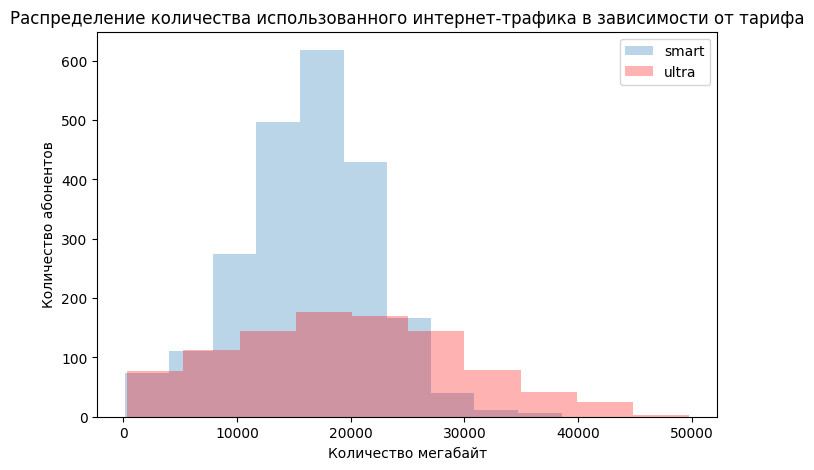

In [33]:
#для интернет трафика

plt.figure(figsize=(8,5))
plt.hist(new_table[(new_table['tariff']=='smart')&(new_table['internet_mb_count']!=0)]['internet_mb_count'], bins = 10, alpha =0.3, label = 'smart')
plt.hist(new_table[(new_table['tariff']=='ultra')&(new_table['internet_mb_count']!=0)]['internet_mb_count'], bins = 10, alpha = 0.3,  color = 'red', label = 'ultra')
plt.xlabel('Количество мегабайт')
plt.ylabel('Количество абонентов')
plt.legend()
plt.title('Распределение количества использованного интернет-трафика в зависимости от тарифа')
plt.show()

Распределение количества сообщений у 2 тарифов похожи, при этом для обоих тарифов справедливо, что большая доля клиентов чаще всего использует одно и то же количество интернет-трафика (15..20 гб)

Клиенты обоих тарифов превышают лимиты по интернет-трафику, установленные тарифом

## Проверьте гипотезы

Для проверки нулевых гипотез будем выдвигать альтернативную с отличным от первончального условия. 
Нулевые гипотезы выдвигаются так, чтобы использовать равенство.
Для сравнения применим t-тест для сравнения независимых выборок

**Гипотеза**

- H0 - Среднемесячные выручки тарифа **smart** и тарифа **ultra** одинаковы 

- H1 - Среднемесячные выручки тарифа **smart** и тарифа **ultra** различны

In [34]:
#создаем соответствующие выборки
smart_revenue = new_table[(new_table['tariff']=='smart')]['revenue'].astype(float)
ultra_revenue = new_table[(new_table['tariff']=='ultra')]['revenue'].astype(float)
print('Среднемесячная выручка от клиентов smart', smart_revenue.mean())
print('Среднемесячная выручка от клиентов ultra', ultra_revenue.mean())

print('Дисперсия среднемесячной выручки от клиентов smart', smart_revenue.var())
print('Дисперсия среднемесячной выручки от клиентов ultra', ultra_revenue.var())

#зададим критическое отклонение (далее оно будет использоваться для всех экспериментов)
alpha = .05

#результат t-теста для независимых выборок 
results = st.ttest_ind(smart_revenue, ultra_revenue, equal_var = False)

#расчитаем значение параметра P и сравними полученное значение с принятым отклонением
print('p-значение', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')


Среднемесячная выручка от клиентов smart 1289.6417040358745
Среднемесячная выручка от клиентов ultra 2070.030425963489
Дисперсия среднемесячной выручки от клиентов smart 669730.763894807
Дисперсия среднемесячной выручки от клиентов ultra 141387.7148093615
p-значение 1.927011394420941e-250
Отвергаем нулевую гипотезу


Альтернативная гипотеза, что среднемесячных выручек тарифов в случайных выборках различны имеет относительно большую вероятность, а нулевую гипотезу об их равенстве стоит отклонить

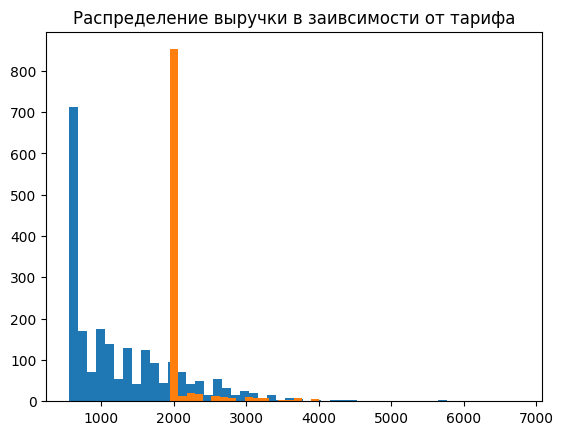

In [40]:
plt.hist(smart_revenue, bins = 50)
plt.hist(ultra_revenue, bins = 25)
plt.title('Распределение выручки в заивсимости от тарифа')
plt.show()

**Гипотеза**

- H0 - средняя выручка пользователей из Москвы равна выручке пользователей из других регионов. 

- H1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [41]:
#создаем соответствующие выборки
moscow_revenue = new_table[(new_table['city']=='Москва')]['revenue'].astype(float)
other_city_revenue = new_table[(new_table['city']!='Москва')]['revenue'].astype(float)
print('Среднемесячная выручка от клиентов в городе Москва', moscow_revenue.mean())
print('Среднемесячная выручка от клиентов в других городах', other_city_revenue.mean())

print('Дисперсия среднемесячной выручки от клиентов в городе Москва', moscow_revenue.var())
print('Дисперсия среднемесячной выручки от клиентов в других городах', other_city_revenue.var())

#зададим критическое отклонение (далее оно будет использоваться для всех экспериментов)
alpha = .05

#результат t-теста для независимых выборок 
results = st.ttest_ind(moscow_revenue, other_city_revenue, equal_var = False)

#расчитаем значение параметра P и сравними полученное значение с принятым отклонением
print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')


Среднемесячная выручка от клиентов в городе Москва 1546.7135842880523
Среднемесячная выручка от клиентов в других городах 1524.7251439539348
Дисперсия среднемесячной выручки от клиентов в городе Москва 565636.467011886
Дисперсия среднемесячной выручки от клиентов в других городах 654069.574962777
p-значение 0.5216952110000278
Не отвергаем нулевую гипотезу


Нулевая гипотеза о равенстве выручки в Москве и дргуих регионах не отклонена, следовательно с определенной погрешностью можно утверждать, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

<div class="alert alert-info">
<font size="4"><b>Комментарий студента</b></font>
    
Касательно твоего замечания можно сказать так:
    
0,36..вероятность получения правильного вывода при верной нулевой гипотезе

## Напишите общий вывод

В ходе исследования были получены следующие результаты:


*По результатам расчета средних и статистических величин* 
- среднему пользователю  тарифа **smart** не хватает лимита интернет-трафика тарифа, в связи с чем пользователь будет доплачивать за дополнительный гб;
- значения тарифа **ultra** имеют большие отклонения от нормальной величины, чем в противоположном тарифе. 

*По построению гистограммы распределения количества минут в зависимости от тарифа* 
- пик клиентов тарифа **ultra** находится правее, что говорит о том, что клиенты тарифа в среднем больше разговаривают по телефону, чем клиенты другого тарифа;
- также можно отметить, что клиенты тарифа **ultra** не превышают лимит по минутам, установленный тарифом

*По построению гистограммы распределения количества сообщений в зависимости от тарифа*
- клиенты тарифа ultra не превышают лимит по количеству сообщений, установленный тарифом

*По построению гистограммы распределения использованного интернет-трафика в зависимости от тарифа*
- большая доля клиентов обоих тарифов чаще всего использует одно и то же количество интернет-трафика (15..20 гб);
- клиенты обоих тарифов превышают лимиты по интернет-трафику, установленные тарифом

Анализ гипотиз показал:

- что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются, так как была опровергнута нулевая гипотеза об их равенстве
- что средняя выручка пользователей из Москвы почти не отличается от выручки пользователей из других регионов, так как не была опровергнута нулевая гипотеза об их равенстве

Резюмируя полученные рультаты:

- общая картина поведения клиентов для двух тарифов в целом похожа: больше предпочитают звонки и интернет. кто-то больше, кто-то меньше, но с определенной погрешностью, их пики распределены в одном диапазоне
- в большинстве случаев клиенту тарифа smart не хватает лимитов, установленных тарифом, в связи с чем он переплачивает за доп. объем услуг (в 640 случаях из 2231 клиент платит больше стоимости тарифы, в 349 из них - переплата или, равна или выше стоимости альтернативного тарифа **ultra**)
- клиентам тарифа **ultra** в большинстве случаев достаточно лимитов внутри тарифа (в 122 из 991 случая клиенты платят выше стоимости тарифа). Однако, стоит отметить, что в 145 случаях из 991 клиенты используют услуги в количестве ниже лимита, установленного дешевым тарифом **smart**.
- за год доля клиентов, которая отказалась от использования тарифа **ultra**  больше (15 из 149), чем аналогичный показатель у тарифа **smart** (23 из 351)

Безусловно, оба тарифа имеют место быть: с одной стороны каждый новый клиент тарифа **ultra** будет приносить в среднем ~ в 2 раза больше месячной выручки , чем новый клиент тарифа **smart**. С другой стороны, тариф **smart** расчитан на массового пользователя, в связи с чем годовая выручка тарифа **smart** больше,чем выручка альтернативного тарифа. 

Не смотря на все плюсы условий тарифа **ultra**, ключевым фактором все же остается его стоимость: клиенты тарифа **smart**, пусть даже и с переплатой по стоимости тарифа, могут за меньшие затраты получить необходимые для себя условия. Кроме того, клиенты тарифа **ultra** со временем чаще отказываются от использования данного тарифа.

Также, компания может произвести оптимизацию тарифов, что может сказаться на их стоимости. Например, из исследования видно, что клиенты в основном разговаривают по телефону или "серфят" в интернете, а сообщениями посредством смс пользуются гораздо реже. Поэтому лимиты по сообщениям, заложенные в тарифы, можно уменьшить. Для клиентов тарифа **ultra** остается большой запас минут, что также можно сократить. Такие мероприятия помогут снизить определенные затраты, заложенные на поддержание тариф и снизить их стоимость, что сделает их более привлекательными и конкурентными.
